In [131]:
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
url= r'C:\Users\meatr\Desktop\SJSU\4 sem\ISE298\Online_Retail.csv'

In [3]:
retail =pd.read_csv(url, engine='python')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
retail.shape

(541909, 8)

In [5]:
print("Total data points: ", retail.shape[0])
print("Total missing values: {} - which is {:.2f}% of total data".format(retail.isnull().sum().sum(), 
                                                      (retail.isnull().sum().sum()*100)/retail.shape[0]))
print("Total unique Countries: ", retail.Country.nunique())
print("Total unique description: ", retail.Description.nunique())
print('Number of duplicated records: ', retail.duplicated(keep='first').sum())

Total data points:  541909
Total missing values: 136534 - which is 25.20% of total data
Total unique Countries:  38
Total unique description:  4223
Number of duplicated records:  5268


In [6]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
## data cleaning
## Converting InvoiceDate" type from object to date type

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
indx = retail[retail.duplicated(keep='first')].index
retail.drop(index = indx, inplace= True)

In [6]:
retail[retail.Description.isna()]
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
## So the columns Description and CustomerID have missing values. Delete them.

retail.dropna(inplace = True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null datetime64[ns]
UnitPrice      401604 non-null float64
CustomerID     401604 non-null float64
Country        401604 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [8]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [9]:
## After removing NAs and Duplicate values from the dataset ##
retail.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
retail.shape

(401604, 8)

In [10]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
retail['year'] = retail['InvoiceDate'].dt.year
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010


Text(0, 0.5, 'Total Quantity Sold')

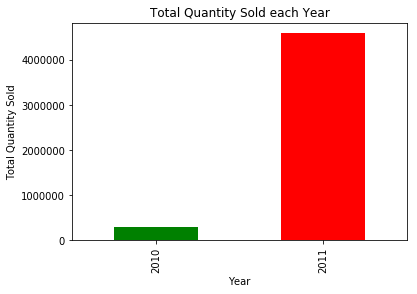

In [12]:
retail.groupby('year')['Quantity'].sum().plot(kind='bar', color=['green','red'], title='Total Quantity Sold each Year')
plt.xlabel('Year')
plt.ylabel('Total Quantity Sold')

In [13]:
# Check the date variations in the DataFrame
print("Min Date: {} \t Max Date: {}".format(retail['InvoiceDate'].min(), retail['InvoiceDate'].max()))

Min Date: 2010-12-01 08:26:00 	 Max Date: 2011-12-09 12:50:00


In [14]:
# Check how many customers the DataFrame have and how many purchases they made
len(retail['CustomerID'].value_counts())
# So there are 4372 unique customers that have made the purchases during the period of 1 year.

4372

In [15]:
# Check quantity of positions 
print("The number of sell positions are {}.\n".format(len(retail['Description'].value_counts())))

# Product that have the most popularity.
print("The most popular merchandise in the E-commerce shop: \n\n{}.".format(retail['Description'].value_counts()[:10]))

The number of sell positions are 3896.

The most popular merchandise in the E-commerce shop: 

WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
Name: Description, dtype: int64.


In [16]:
retail.describe()

,Quantity,UnitPrice,CustomerID,year
count,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,2010.934378
std,250.283037,69.764035,1714.006089,0.247620
min,-80995.000000,0.000000,12346.000000,2010.000000
25%,2.000000,1.250000,13939.000000,2011.000000
50%,5.000000,1.950000,15145.000000,2011.000000
75%,12.000000,3.750000,16784.000000,2011.000000
max,80995.000000,38970.000000,18287.000000,2011.000000


In [17]:
## Cleaning data by removing -ve values
retail= retail[retail['Quantity'] > 0]
retail= retail[retail['UnitPrice'] > 0.05]
retail.describe()

,Quantity,UnitPrice,CustomerID,year
count,392622.000000,392622.000000,392622.000000,392622.000000
mean,13.100127,3.126464,15287.928096,2010.934619
std,180.495894,22.243780,1713.544575,0.247197
min,1.000000,0.060000,12346.000000,2010.000000
25%,2.000000,1.250000,13955.000000,2011.000000
50%,6.000000,1.950000,15150.000000,2011.000000
75%,12.000000,3.750000,16791.000000,2011.000000
max,80995.000000,8142.750000,18287.000000,2011.000000


In [18]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
year                    int64
dtype: object

Text(0, 0.5, 'TotalPrice')

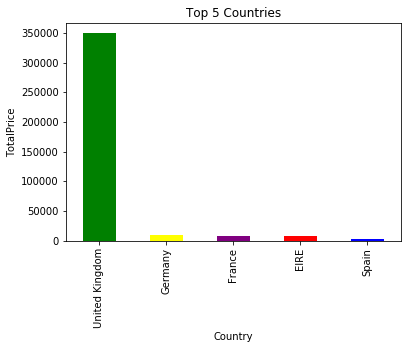

In [19]:
#Top 5 Most common countries

retail.Country.value_counts()[:5].plot(kind='bar',color=['green', 'yellow', 'purple', 'red', 'blue'], title='Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('TotalPrice')


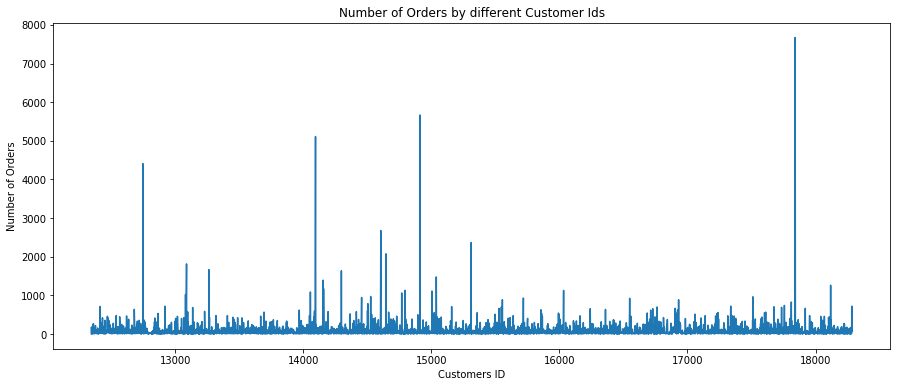

In [25]:
##Number of Orders by different Customer Ids
orders = retail.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by different Customer Ids')
plt.show()

In [21]:
retail.insert(loc=2, column='year_month', value=retail['InvoiceDate'].map(lambda x: 100*x.year + x.month))

In [22]:
retail['year_month'].value_counts()

201111    63159
201110    48777
201109    39657
201105    28073
201106    26918
201103    26870
201108    26781
201107    26567
201012    25670
201104    22432
201101    20988
201102    19706
201112    17024
Name: year_month, dtype: int64

In [23]:
retail['Country'].value_counts()

United Kingdom          349144
Germany                   9018
France                    8326
EIRE                      7222
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [24]:
retail[retail['Country'] == 'United Kingdom']
retail.head()

,InvoiceNo,StockCode,year_month,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010
1,536365,71053,201012,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010


In [25]:
# Calculate total sales from the Quantity and UnitPrice
retail['Amount'] = retail['Quantity'] * retail['UnitPrice']

In [26]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

In [27]:
# Show top 10 customers, max and min amounts paid   
res_df = retail.groupby(['CustomerID']).sum()
res_df.sort_values('Amount',ascending=False,inplace=True)
final_df = res_df[(res_df['Quantity'] > 0) & (res_df['Amount'] > 0)]

print('customer Id {} who paid the maximum amount {}'.format(int(final_df['Amount'].argmax()),final_df['Amount'].max()))
print('customer Id {} who paid the minimum amount {}'.format(int(final_df['Amount'].argmin()),final_df['Amount'].min()))

final_df.head(10)

customer Id 14646 who paid the maximum amount 280206.01999999984
customer Id 16738 who paid the minimum amount 3.75


,year_month,Quantity,UnitPrice,year,Amount
CustomerID,,,,,
14646.0,417490759,196915,5176.09,4174766,280206.02
18102.0,86676046,64124,1940.92,866723,259657.30
17450.0,67571584,69973,1135.32,675693,194390.79
16446.0,603322,80997,4.98,6033,168472.50
14911.0,1139650734,79940,26150.23,11396046,143699.17
12415.0,143589638,77374,2097.08,1435854,124914.53
14156.0,280341687,57668,5348.69,2803331,117206.08
17511.0,193657715,64549,2221.28,1936505,91062.38
16029.0,48463669,40108,8720.65,484619,80850.84


In [28]:
# total sales at each country, how many quantites sold at each country 
country_df = retail.groupby(['Country']).sum()
country_df.sort_values('Amount',ascending=False,inplace=True)
country_df.drop('CustomerID',axis=1,inplace=True)
country_df.head()

,year_month,Quantity,UnitPrice,year,Amount
Country,,,,,
United Kingdom,70213178315,4233901,1.037944e+06,702105126,7.284729e+06
Netherlands,474403596,200361,6.247730e+03,4743877,2.854463e+05
EIRE,1452366699,139733,3.213480e+04,14523109,2.652465e+05
Germany,1813534545,118354,3.349930e+04,18134687,2.286464e+05
France,1674377594,111428,3.678898e+04,16743152,2.089343e+05


In [29]:
retail['Amount'] = retail['Quantity'] * retail['UnitPrice']
df1['Amount'] = retail.groupby('CustomerID')['Amount'].sum()

In [30]:
df2= retail.groupby('CustomerID')['InvoiceNo'].count()
df2 = df2.reset_index()
df2.columns = ['CustomerID','Frequency']
df2.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [31]:
df = pd.merge(df1,df2,on='CustomerID',how='inner')

In [32]:
Recency = retail['InvoiceDate'].max()

retail['Recency'] = Recency - retail['InvoiceDate']

df3 = retail.groupby('CustomerID')['Recency'].min()
df3 = df3.reset_index()

df3['Recency'] = df3['Recency'].dt.days

In [33]:
df = pd.merge(df,df3,on='CustomerID',how='inner')
df.columns = ['CustomerID','Amount','Frequency','Recency']
df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [36]:
df.describe()

,CustomerID,Amount,Frequency,Recency
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,2048.608781,90.507607,91.536422
std,1721.808492,8985.119259,225.461774,100.014169
min,12346.000000,3.750000,1.000000,0.000000
25%,13813.250000,306.482500,17.000000,17.000000
50%,15299.500000,668.570000,41.000000,50.000000
75%,16778.750000,1660.597500,98.000000,141.000000
max,18287.000000,280206.020000,7675.000000,373.000000


In [37]:
Q1 = df.Amount.quantile(0.05)
Q3 = df.Amount.quantile(0.95)

IQR = Q3 - Q1
df = df[ (df['Amount']  >= Q1 - 1.5 * IQR) & (df['Amount'] <= Q3 + 1.5 * IQR)]

Q1 = df.Frequency.quantile(0.05)
Q3 = df.Frequency.quantile(0.95)

IQR = Q3 - Q1
df = df[ (df['Frequency']  >= Q1 - 1.5 * IQR) & (df['Frequency'] <= Q3 + 1.5 * IQR)]

Q1 = df.Recency.quantile(0.05)
Q3 = df.Recency.quantile(0.95)

IQR = Q3 - Q1
df = df[ (df['Recency']  >= Q1 - 1.5 * IQR) & (df['Recency'] <= Q3 + 1.5 * IQR)]

df.head()

,CustomerID,Amount,Frequency,Recency
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,2506.04,85,35


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled = scaler.fit_transform(df[['Amount','Frequency','Recency']])

df_scaled = pd.DataFrame(scaled,columns=['Amount','Frequency','Recency'])

df_scaled.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Amount,Frequency,Recency
0,1.660329,1.082846,-0.917855
1,0.267337,-0.456325,-0.189261
2,0.245334,-0.028211,-0.748182
3,-0.543613,-0.599030,2.156212
4,0.660273,0.094107,-0.578510


In [40]:
retail.head()

,InvoiceNo,StockCode,year_month,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,Amount,Recency
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,15.30,373 days 04:24:00
1,536365,71053,201012,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,373 days 04:24:00
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,22.00,373 days 04:24:00
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,373 days 04:24:00
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,20.34,373 days 04:24:00


In [41]:
print('Min_date {} \nMax_date {}'.format(min(retail.InvoiceDate), max(retail.InvoiceDate)))

Min_date 2010-12-01 08:26:00 
Max_date 2011-12-09 12:50:00


In [50]:
snapshot_date = max(retail.InvoiceDate) + dt.timedelta(days = 1)

In [66]:
#DataFrame
rfm_data = retail.groupby(['CustomerID']).agg({
                                                'InvoiceDate' : lambda x: (snapshot_date - x.max()).days,
                                                'InvoiceNo' : 'count',
                                                'Amount' : 'sum'
                                                })

# Rename the created data columns in order to interpritate the obtained results
rfm_data.rename(columns = {
                            'InvoiceDate' : 'Recency',
                            'InvoiceNo' : 'Frequency',
                            'Amount' : 'Monetary_Value'
                            }, inplace = True)

# Check the obtained results
rfm_data.head()

,Recency,Frequency,Monetary_Value
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [67]:
# Labels for Recency, Frequenct and Monetary values metrics
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

# Recency metric quartiles
r_quartiles = pd.qcut(rfm_data['Recency'], 4, labels = r_labels)
rfm_data = rfm_data.assign(R = r_quartiles.values)

# Frequency metric quartiles
f_quartiles = pd.qcut(rfm_data['Frequency'], 4, labels = r_labels)
rfm_data = rfm_data.assign(F = f_quartiles.values)

# Monetary Value metric quartiles
m_quartiles = pd.qcut(rfm_data['Monetary_Value'], 4, labels = m_labels)
rfm_data = rfm_data.assign(M = m_quartiles.values)

In [68]:
rfm_data.head()

,Recency,Frequency,Monetary_Value,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,4,4
12347.0,2,182,4310.00,4,1,4
12348.0,75,31,1797.24,2,3,4
12349.0,19,73,1757.55,3,2,4
12350.0,310,17,334.40,1,4,2


In [69]:
# Define function concat_rfm that will concatenate integer to string value
def concat_rfm(x):
    """
    Function which return a concatenated string from integer values.
    """
    return str(x['R']) + str(x['F']) + str(x['M'])

# Calculate the RFM segment 
rfm_data['RFM_Segment'] = rfm_data.apply(concat_rfm, axis = 1)

# Calculate the RFM score which is the sum of RFM values
rfm_data['RFM_Score'] = rfm_data[['R', 'F', 'M']].sum(axis = 1)

In [70]:
rfm_data.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,4,4,144,9.0
12347.0,2,182,4310.00,4,1,4,414,9.0
12348.0,75,31,1797.24,2,3,4,234,9.0
12349.0,19,73,1757.55,3,2,4,324,9.0
12350.0,310,17,334.40,1,4,2,142,7.0


In [71]:
# Explore the RFM score in the rfm_data
rfm_data.RFM_Score.value_counts().sort_index()

4.0       37
5.0      204
6.0      879
7.0      997
8.0     1050
9.0      935
10.0     191
11.0      39
12.0       6
Name: RFM_Score, dtype: int64

In [72]:
# Explore the RFM segment in the rfm_data
rfm_data.RFM_Segment.value_counts().sort_values(ascending = False)[:10]

414    450
141    381
314    217
132    206
241    179
223    168
323    164
232    157
423    149
332    132
Name: RFM_Segment, dtype: int64

In [73]:
##Assign label to each of the RFM segment based on the RFM scores
def auto_rfm_level(df):
    """
    Function that auto assigns humanlike segment to each RFM Segments.
    """
    if df['RFM_Score'] >= 9:
        return 'Top'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 9)):
        return 'Middle'
    else:
        return 'Low'



# In order to save the RFM labels create a new column where to store it
rfm_data['RFM_Level'] = rfm_data.apply(auto_rfm_level, axis = 1)

# Explore the obtained results
rfm_data.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,4,4,144,9.0,Top
12347.0,2,182,4310.00,4,1,4,414,9.0,Top
12348.0,75,31,1797.24,2,3,4,234,9.0,Top
12349.0,19,73,1757.55,3,2,4,324,9.0,Top
12350.0,310,17,334.40,1,4,2,142,7.0,Middle


In [74]:
# Explore the obtained RFM levels
print("Absolute values \n{} \n\nRelative values \n{}".format(rfm_data.RFM_Level.value_counts(),
                                                             rfm_data.RFM_Level.value_counts(normalize = True)))

Absolute values 
Middle    2926
Top       1171
Low        241
Name: RFM_Level, dtype: int64 

Relative values 
Middle    0.674504
Top       0.269940
Low       0.055556
Name: RFM_Level, dtype: float64


In [75]:
# Let's dig deeper into the RFM Score
rfm_data.groupby('RFM_Score').agg({
                                    'Recency' : 'mean',
                                    'Frequency' : 'mean',
                                    'Monetary_Value' : ['mean', 'count']
}).round(1)

Recency Frequency Monetary_Value      
             mean      mean           mean count
RFM_Score                                       
4.0         253.0      62.9          252.2    37
5.0         218.4      58.3          373.4   204
6.0         206.7      37.0          453.8   879
7.0          96.7      58.7          892.5   997
8.0          45.8      88.7         1725.4  1050
9.0          18.4     197.7         5247.8   935
10.0         18.1      45.2         2595.8   191
11.0         14.1      20.2         2521.5    39
12.0          8.2       6.0        33370.7     6

In [77]:
# Let's dig deeper into the RFM Level
rfm_data.groupby('RFM_Level').agg({
                                    'Recency' : 'mean',
                                    'Frequency' : 'mean',
                                    'Monetary_Value' : ['mean', 'count']
}).round(1)

Recency Frequency Monetary_Value      
             mean      mean           mean count
RFM_Level                                       
Low         223.7      59.0          354.8   241
Middle      111.5      62.9         1059.6  2926
Top          18.2     165.9         4868.5  1171

In [79]:
# So to identify what type of data we have let's call describe method to show basic stats info
rfm_data.describe()

,Recency,Frequency,Monetary_Value,RFM_Score
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,92.536422,90.507607,2048.608781,7.525818
std,100.014169,225.461774,8985.119259,1.367599
min,1.000000,1.000000,3.750000,4.000000
25%,18.000000,17.000000,306.482500,6.000000
50%,51.000000,41.000000,668.570000,8.000000
75%,142.000000,98.000000,1660.597500,9.000000
max,374.000000,7675.000000,280206.020000,12.000000


In [80]:
# The average values of the variables in the rfm_data dataset
print(np.mean(rfm_data))

Recency             92.536422
Frequency           90.507607
Monetary_Value    2048.608781
R                    2.513831
F                    2.511987
M                    2.500000
RFM_Segment               inf
RFM_Score            7.525818
dtype: float64


In [81]:
# The standard deviation of the variables in the dataset
print(np.std(rfm_data))

Recency            100.002640
Frequency          225.435785
Monetary_Value    8984.083570
R                    1.126166
F                    1.122497
M                    1.118240
RFM_Score            1.367441
dtype: float64


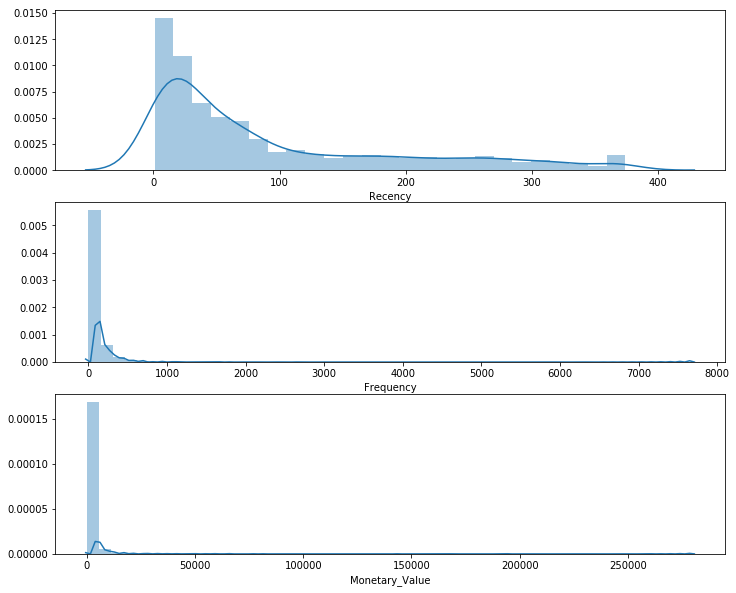

In [83]:
# Visual Exploration of skeweness in the data
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1);
sns.distplot(rfm_data['Recency']);

plt.subplot(3, 1, 2);
sns.distplot(rfm_data['Frequency']);

plt.subplot(3, 1, 3);
sns.distplot(rfm_data['Monetary_Value'])


plt.show();

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Log Transformation
log_transformed_rfm = np.log(raw_rfm)

# Initializing a standard scaler and fitting it
scaler = StandardScaler()
scaler.fit(log_transformed_rfm)

# Scale and center data
rfm_normalized = scaler.transform(log_transformed_rfm)

# Create the final dataframe to work with a Clustering problem
rfm_normalized = pd.DataFrame(data = rfm_normalized, index = raw_rfm.index, columns = raw_rfm.columns)

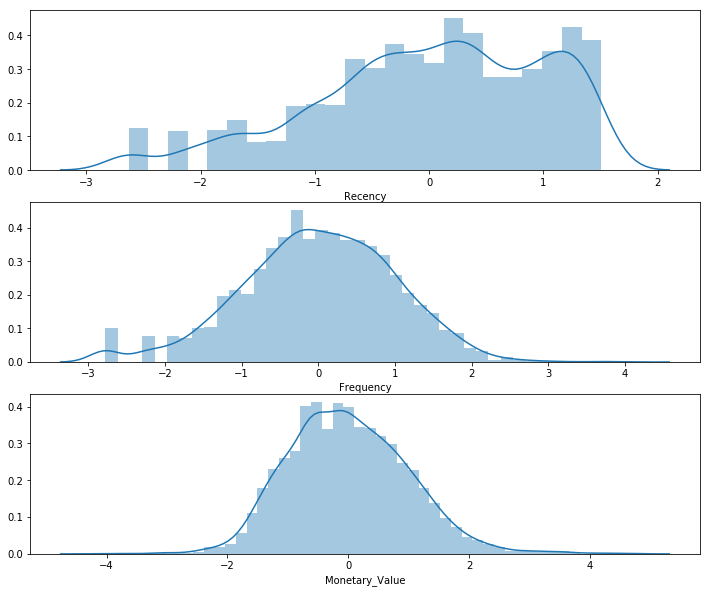

In [89]:
# Visualise the obtained results
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1)
sns.distplot(rfm_normalized['Recency'])

plt.subplot(3, 1, 2)
sns.distplot(rfm_normalized['Frequency'])

plt.subplot(3, 1, 3)
sns.distplot(rfm_normalized['Monetary_Value'])

plt.show()

In [90]:
# Mean
print('Mean value of the data: \n\n{}'.format(rfm_normalized.mean(axis = 0).round(2)))

# Standard Deviation
print('\nStandard Deviation value of the data: \n\n{}'.format(rfm_normalized.std(axis = 0).round(2)))

Mean value of the data: 

Recency          -0.0
Frequency         0.0
Monetary_Value   -0.0
dtype: float64

Standard Deviation value of the data: 

Recency           1.0
Frequency         1.0
Monetary_Value    1.0
dtype: float64


In [91]:
# Initialisation of KMeans algorithm with number of cluster 4 (why I choose this I explain further)
kmeans = KMeans(n_clusters = 4, random_state = 42)

# Fit k-means cluster algorithm on the normalized data (rfm_normalized)
kmeans.fit(rfm_normalized)

# Extract the obtained cluster labels
cluster_labels = kmeans.labels_

In [93]:
# Create a DataFrame by adding a new cluster label column
rfm_cluster_k4 = rfm_data.assign(Cluster = cluster_labels)

# Group by cluster label
grouped_clusters_rfm = rfm_cluster_k4.groupby(['Cluster'])

grouped_clusters_rfm.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary_Value': ['mean', 'count']
  }).round(1)

Recency Frequency Monetary_Value      
           mean      mean           mean count
Cluster                                       
0          93.8      80.1         1517.9  1289
1          19.5      38.6          593.1   832
2         184.2      14.8          296.3  1380
3          12.2     283.1         7201.7   837

1 : 13014.000000000002
2 : 6883.666473371964
3 : 5314.324607525677
4 : 4439.767378817997
5 : 3766.203253830972
6 : 3366.554658638976
7 : 3046.4017561728906
8 : 2802.1363426484068
9 : 2628.498187081409


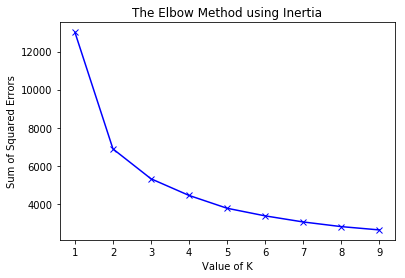

In [99]:
from scipy.spatial.distance import cdist

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(rfm_normalized) 
    kmeanModel.fit(rfm_normalized)     
      
    distortions.append(sum(np.min(cdist(rfm_normalized, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / rfm_normalized.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(rfm_normalized, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / rfm_normalized.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val))
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Value of K') 
plt.ylabel('Sum of Squared Errors') 
plt.title('The Elbow Method using Inertia') 
plt.show()     

In [ ]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_normalized)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_normalized, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [100]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [101]:
 kmeans.labels_

array([0, 2, 0, ..., 1, 2, 0])

In [102]:
rfm_normalized['Cluster'] = kmeans.labels_
rfm_normalized['Cluster'].value_counts()

0    1855
1    1528
2     955
Name: Cluster, dtype: int64

In [103]:
rfm_normalized.head()

,Recency,Frequency,Monetary_Value,Cluster
CustomerID,,,,
12346.0,1.409894,-2.779571,3.700138,0
12347.0,-2.146498,1.160498,1.413286,2
12348.0,0.383971,-0.179623,0.720009,0
12349.0,-0.574674,0.468831,0.702309,0
12350.0,1.374758,-0.634482,-0.612884,1


In [104]:
# assign the label
rfm_normalized['Cluster_Id'] = kmeans.labels_
rfm_normalized.head()

,Recency,Frequency,Monetary_Value,Cluster,Cluster_Id
CustomerID,,,,,
12346.0,1.409894,-2.779571,3.700138,0,0
12347.0,-2.146498,1.160498,1.413286,2,2
12348.0,0.383971,-0.179623,0.720009,0,0
12349.0,-0.574674,0.468831,0.702309,0,0
12350.0,1.374758,-0.634482,-0.612884,1,1


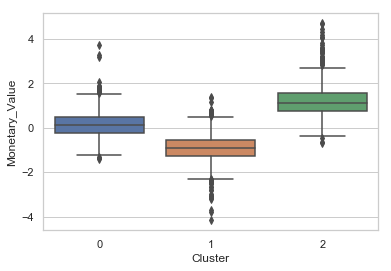

In [106]:
# Box plot to visualize Cluster vs Total_Amount
sns.set(style="whitegrid")
sns.boxplot(x='Cluster', y='Monetary_Value', data=rfm_normalized)

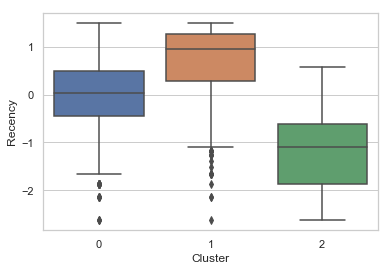

In [107]:
# Box plot to visualize Cluster vs Recency
sns.set(style="whitegrid")
sns.boxplot(x='Cluster', y='Recency', data=rfm_normalized)

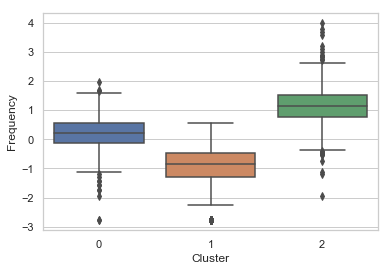

In [108]:
sns.boxplot(x='Cluster', y='Frequency', data=rfm_normalized)

In [112]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(df_scaled)
pred = kmeans.predict(df_scaled)


In [113]:
#frame = pd.DataFrame(df_scaled)
df['Cluster'] = kmeans.labels_
df['Cluster'].value_counts()

0    2710
2    1050
1     497
Name: Cluster, dtype: int64

In [114]:
df.head()

,CustomerID,Amount,Frequency,Recency,Cluster
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2
5,12352.0,2506.04,85,35,0


Text(0, 0.5, 'Amount')

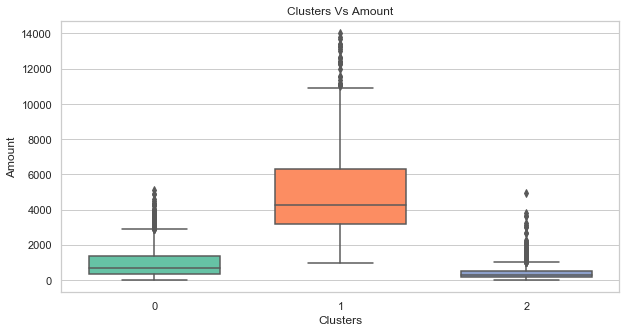

In [116]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df['Cluster'] ,y = df['Amount'],orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Clusters Vs Amount")
plt.xlabel("Clusters")
plt.ylabel("Amount")

Text(0, 0.5, 'Frequency')

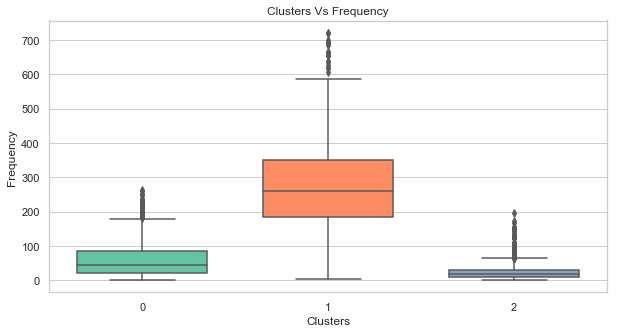

In [117]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df['Cluster'] ,y = df['Frequency'],orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Clusters Vs Frequency")
plt.xlabel("Clusters")
plt.ylabel("Frequency")

Text(0, 0.5, 'Recency')

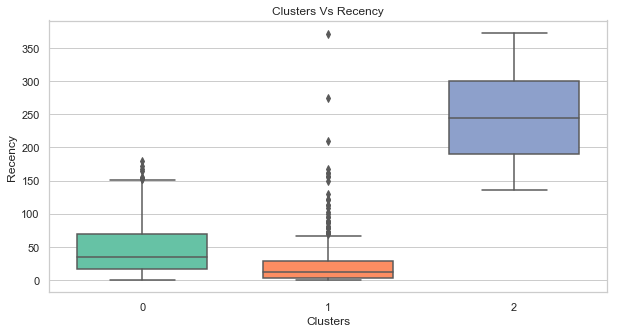

In [129]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df['Cluster'] ,y = df['Recency'],orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Clusters Vs Recency")
plt.xlabel("Clusters")
plt.ylabel("Recency")

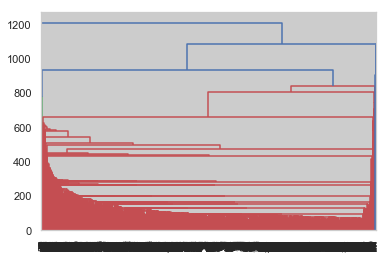

In [119]:
# Single linkage: 

mergings = linkage(df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

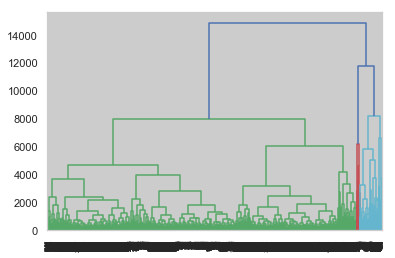

In [120]:
# Complete linkage

mergings = linkage(df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

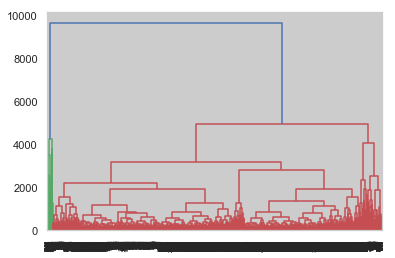

In [121]:
# Average linkage

mergings = linkage(df, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [122]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, ..., 1, 1, 1])

In [123]:
# Assign cluster labels

df['Clusters'] = cluster_labels
df.head()

,CustomerID,Amount,Frequency,Recency,Cluster,Clusters
1,12347.0,4310.00,182,1,1,0
2,12348.0,1797.24,31,74,0,1
3,12349.0,1757.55,73,18,0,1
4,12350.0,334.40,17,309,2,1
5,12352.0,2506.04,85,35,0,1


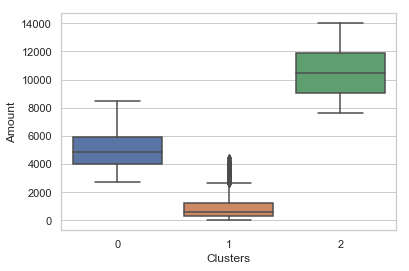

In [130]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Clusters', y='Amount', data=df)

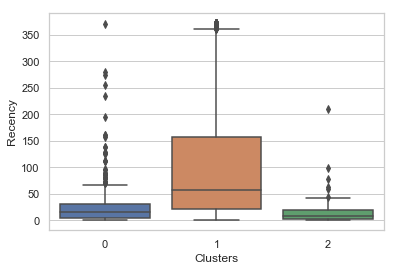

In [126]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Clusters', y='Recency', data=df)

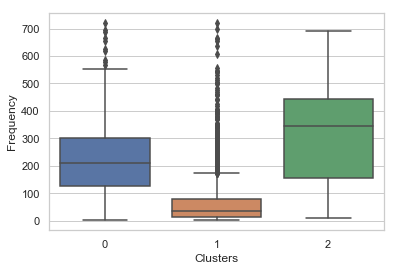

In [127]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Clusters', y='Frequency', data=df)

